In [2]:
# apply Jupyter notebook style
from IPython.core.display import HTML

from custom.styles import style_string

HTML(style_string)


# Introduction to Data Fitting with SciKitLearn

<div class="overview admonition"> 
<p class="admonition-title">Overview</p>

Questions:

* How do I fit a model using SciKitLearn?

* How can I use SciKitLearn to assess my model?

* How can I use other models from the SciKitLearn library?

Objectives:

* Fit a linear model using SciKitLearn.
    
* Use train_test_split to split the data.

* Try other models from SciKitLearn.

</div>

## Data Loading and Visualization

Before fitting our models, we will first load our data using pandas and visualize the linear relationships using seaborn.
For a review of pandas and seaborn, see notebok `03_python_data_science`.

In [1]:
import pandas as pd # for dataframes

df = pd.read_csv("data/amino_acids.csv") # Load the data file created in the last lesson

In [4]:
df.head() # preview the first five rows.

,ID,SMILES,MolWt,TPSA,NumHeavyAtoms
0,Ala,C[C@H](N)C(=O)O,89.094,63.32,6
1,Arg,N=C(N)NCCC[C@H](N)C(=O)O,174.204,125.22,12
2,Asn,NC(=O)C[C@H](N)C(=O)O,132.119,106.41,9
3,Asp,N[C@@H](CC(=O)O)C(=O)O,133.103,100.62,9
4,Cys,N[C@@H](CS)C(=O)O,121.161,63.32,7


For our first example using SciKitLearn, we are going to fit a linear model to the Molecular Weight.
When performing fits to variables, it is a common practice to visualize the relationship between 
each potential fit variable and the proprety of interest (in this case the molecular weight).

### Data Transformation using df.melt

Seaborn has a function called `lmplot` that is commonly used for this purpose. 
In order to use `lmplot`, we first have to transform our data to a specific format called
"long form" using `df.melt`. It's important that we only use the numeric types for this 
analysis.

In [5]:
# Get a dataframe with only numeric data types.
numeric_df = df.select_dtypes(include=["number"])

# Transform the data using df.melt. Save in a new dataframe 
# called df_vis
df_vis = numeric_df.melt(id_vars="MolWt")
df_vis.head() # preview the first 5 rows.

,MolWt,variable,value
0,89.094,TPSA,63.32
1,174.204,TPSA,125.22
2,132.119,TPSA,106.41
3,133.103,TPSA,100.62
4,121.161,TPSA,63.32


Now, we can use the `lmplot` in the seaborn library

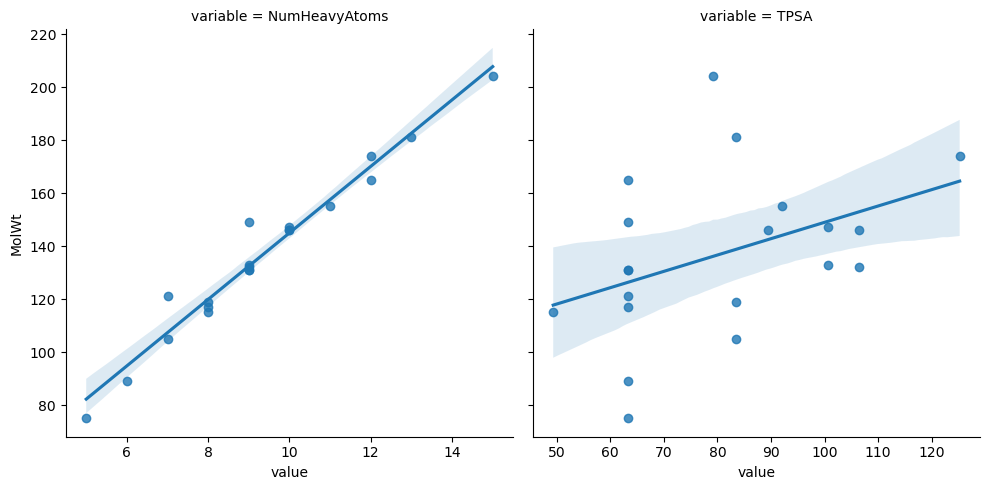

In [4]:
g = sns.lmplot(data=df_vis, y="MolWt", x="value", col="variable", facet_kws={"sharex":False})

## Fitting using SciKitLearn

In [30]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

In [31]:
X = df[["NumHeavyAtoms"]]
Y = df[["MolWt"]]

linear_model = LinearRegression()
linear_model.fit(X,Y)

LinearRegression()

In [32]:
linear_model.score(X, Y)

0.963306473431153

In [33]:
# use the model to make predictions and add it to the graph
model_values = linear_model.predict(X)

df["PredictedWt"] = model_values


<Axes: xlabel='MolWt', ylabel='PredictedWt'>

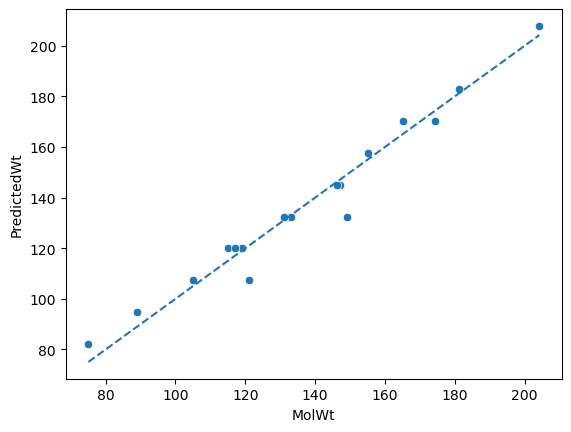

In [34]:
sns.scatterplot(x="MolWt", y="PredictedWt", data=df)
sns.lineplot(x="MolWt", y="MolWt", data=df, linestyle='--')

In [53]:
# Evaluate the model's performance
mse = mean_squared_error(Y, model_values)
rmse = math.sqrt(mse)
r2 = r2_score(Y, model_values)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Squared Error: 33.206563399005
Root Mean Squared Error: 5.762513635472371
R2 Score: 0.963306473431153


<div class="exercise admonition">
<p class="admonition-title">Exercise</p>
<p> Repeat analysis
<p>
    Paragraph 2
</p>
</div>


In [54]:
# Train test split

from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [56]:
ttt_model = LinearRegression()
ttt_model.fit(X_train, Y_train)

LinearRegression()

In [57]:
y_pred = ttt_model.predict(X_test)

In [58]:
import math

# Evaluate the model's performance
mse = mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Squared Error: 12.331741278045993
Root Mean Squared Error: 3.511657910168072
R2 Score: 0.974864631906907
